# Eleições Presidenciais - Brasil 2022

##  Verificação das anomalias apresentadas em live realizada na Argentina em 05/11/2011 por meio das informações publicadas do 2º Turno pelo Portal de Dados Abertos do TSE.

In [1]:
# Importando s bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

As informaçòes deste notebook podem ser replicadas para qualquer UF, sendo necessária apenas a substituição do arquivo .csv da célula abaixo. Os arquivos de todas as UF de resultados de boletins das urnas foram disponibilizadas pelo Portal de Dados Abertos do TSE - https://dadosabertos.tse.jus.br/dataset/resultados-2022-boletim-de-urna

In [2]:
arquivo = 'bweb_2t_AL_311020221535.csv'
data = pd.read_csv(arquivo, sep=';', encoding='Latin 1', low_memory=False)

In [3]:
# Filtrando apenas os dados das eleições presidenciais
df = data[data['DS_CARGO_PERGUNTA'] == 'Presidente'].reset_index(drop=True)

In [4]:
# Visualização do dataset
df.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,587B7DAA,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1
1,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,587B7DAA,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1
2,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,587B7DAA,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1


In [5]:
# Colunas/informações disponíveis no dataset
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

A identificação do modelo da urna é realizado a partir da informação da coluna "NR_URNA_EFETIVADA" com o ID da urna, de acordo com as informação do TSE cada modelo de urna é referenciado pela sequência desse ID. Essa faixa sequencial é encontrada na página "Correspondência entre número interno e modelo da urna" https://dadosabertos.tse.jus.br/dataset/correspondencia-entre-numero-interno-e-modelo-da-urna-1

In [6]:
# Correspondência entre número interno e modelo da urna
df_model = pd.read_csv('modelourna_numerointerno.csv', sep=';', encoding='Latin 1')
df_model

,DS_MODELO_URNA,NR_FAIXA_INICIAL,NR_FAIXA_INICIAL.1
0,2009,999500,1220500
1,2010,1220501,1345500
2,2011,1368501,1370500
3,2011,1600000,1650000
4,2013,1650001,1701000
5,2015,1750000,1950000
6,2020,2000000,2250000


In [7]:
# Inserindo o modelo da urna ao DataFrame

# Função para identificação do modelo
def model(nr):
    for i in range(len(df_model)):
        if (nr >= df_model['NR_FAIXA_INICIAL'][i]) & (nr >= df_model['NR_FAIXA_INICIAL'][i]):
            mod = df_model['DS_MODELO_URNA'][i]
    return mod

# Inserção da coluna

lista = []
for i in range(len(df)):
    x = model(df['NR_URNA_EFETIVADA'][i])
    lista.append(x)

df['MODELO'] = lista

In [8]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA,MODELO
0,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1,2020
1,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1,2020
2,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1,2020
3,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,25/09/2022 08:05:00,1 - 1,2,30/10/2022 08:00:01,30/10/2022 17:01:12,19,30/10/2022 17:03:53,-1,-1,2020
4,31/10/2022,15:36:48,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,25/09/2022 08:09:00,1 - 3,4,30/10/2022 08:00:01,30/10/2022 17:02:15,18,30/10/2022 17:03:54,-1,-1,2020


In [9]:
# Agrupamento das informações para consolidação dos resultados por urna
df_temp = df[['NR_URNA_EFETIVADA', 
              'NR_PARTIDO', 
              'QT_VOTOS']].groupby(['NR_URNA_EFETIVADA', 
                                    'NR_PARTIDO']).sum().reset_index()

In [10]:
# Visualização do dataset preliminar
# Votos nulos -> "NR_PARTIDO" = -1 
df_temp.head(6)

,NR_URNA_EFETIVADA,NR_PARTIDO,QT_VOTOS
0,1000241,-1,17
1,1000241,13,214
2,1000241,22,20
3,1000242,-1,16
4,1000242,13,152
5,1000242,22,58


In [11]:
# Consolidação dos resultados por direcionamento do voto (Nulo/Lula/Bolsonaro)

df_null = df_temp[df_temp['NR_PARTIDO'] == -1].reset_index(drop=True)
df_lula = df_temp[df_temp['NR_PARTIDO'] == 13].reset_index(drop=True)
df_bolsonaro = df_temp[df_temp['NR_PARTIDO'] == 22].reset_index(drop=True)

df_null.columns = ['NR_URNA_EFETIVADA', 'NR_PARTIDO', 'NULOS']
df_lula.columns = ['NR_URNA_EFETIVADA', 'NR_PARTIDO', 'LULA']
df_bolsonaro.columns = ['NR_URNA_EFETIVADA', 'NR_PARTIDO', 'BOLSO']

In [12]:
# Visualização da consolidação
df_null.head(3)

,NR_URNA_EFETIVADA,NR_PARTIDO,NULOS
0,1000241,-1,17
1,1000242,-1,16
2,1000530,-1,26


In [13]:
# Consolidação dos resultados por urna

colunas = ['NR_URNA_EFETIVADA', 'MODELO', 'NM_MUNICIPIO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES']
df1 = df[colunas].drop_duplicates().reset_index(drop=True)

# Inserção do quantitativo dos votos as dataframe
df1 = df1.merge(df_lula[['NR_URNA_EFETIVADA', 'LULA']], how='left', on='NR_URNA_EFETIVADA')
df1 = df1.merge(df_bolsonaro[['NR_URNA_EFETIVADA', 'BOLSO']], how='left', on='NR_URNA_EFETIVADA')
df1 = df1.merge(df_null[['NR_URNA_EFETIVADA', 'NULOS']], how='left', on='NR_URNA_EFETIVADA')

# Inserção dos cálculos percentuais
df1['%_LULA'] = round(100 * df1['LULA'] / df1['QT_COMPARECIMENTO'], 1)
df1['%_BOLSO'] = round(100 * df1['BOLSO'] / df1['QT_COMPARECIMENTO'], 1)
df1['%_NULOS'] = round(100 * df1['NULOS'] / df1['QT_COMPARECIMENTO'], 1)

In [14]:
# Visualização do dataframe
df1.head()

,NR_URNA_EFETIVADA,MODELO,NM_MUNICIPIO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,LULA,BOLSO,NULOS,%_LULA,%_BOLSO,%_NULOS
0,2071468,2020,MACEIÓ,336,265,71,99,148,18.0,37.4,55.8,6.8
1,2038339,2020,MACEIÓ,341,296,45,116,154,26.0,39.2,52.0,8.8
2,2072024,2020,MACEIÓ,336,278,58,115,144,19.0,41.4,51.8,6.8
3,2069479,2020,MACEIÓ,336,277,59,118,142,17.0,42.6,51.3,6.1
4,2074297,2020,MACEIÓ,341,280,61,106,160,14.0,37.9,57.1,5.0


In [15]:
# Síntese do dataframe
ab = round(100 * df1['QT_ABSTENCOES'].sum() / df1['QT_APTOS'].sum(), 2)
pt = round(100 * df1['LULA'].sum() / df1['QT_COMPARECIMENTO'].sum(), 2)
pl = round(100 * df1['BOLSO'].sum() / df1['QT_COMPARECIMENTO'].sum(), 2)
nu = round(100 * df1['NULOS'].sum() / df1['QT_COMPARECIMENTO'].sum(), 2)
print('Lula:', pt, '% dos votos')
print('Bolsonaro:', pl, '% dos votos')
print('Nulos:', nu, '% dos votos')
print('Abstenções:',ab, '% dos eleitores')

Lula: 54.72 % dos votos
Bolsonaro: 38.53 % dos votos
Nulos: 6.74 % dos votos
Abstenções: 23.25 % dos eleitores


In [16]:
# Verificação do número de eleitores por município
df_eleitores = df1[['NM_MUNICIPIO', 
                    'QT_APTOS']].groupby('NM_MUNICIPIO').sum().sort_values('QT_APTOS', 
                                                                           ascending=False).reset_index()
df_eleitores.head(10)

,NM_MUNICIPIO,QT_APTOS
0,MACEIÓ,629130
1,ARAPIRACA,150976
2,RIO LARGO,62222
3,PALMEIRA DOS ÍNDIOS,52597
4,UNIÃO DOS PALMARES,46244
5,SÃO MIGUEL DOS CAMPOS,42474
6,PENEDO,42055
7,MARECHAL DEODORO,40919
8,CORURIPE,40155
9,DELMIRO GOUVEIA,39011


In [17]:
# Listando as cidades em grupos com menos de 100k e 50k eleitores
lista_100k = list(df_eleitores[df_eleitores['QT_APTOS'] <= 100000]['NM_MUNICIPIO'])
lista_50k = list(df_eleitores[df_eleitores['QT_APTOS'] <= 50000]['NM_MUNICIPIO'])
lista_50k[:10]

['UNIÃO DOS PALMARES',
 'SÃO MIGUEL DOS CAMPOS',
 'PENEDO',
 'MARECHAL DEODORO',
 'CORURIPE',
 'DELMIRO GOUVEIA',
 'SANTANA DO IPANEMA',
 'ATALAIA',
 'TEOTÔNIO VILELA',
 'GIRAU DO PONCIANO']

In [18]:
# Dataframe com teto de eleitores por município
df_100k = df1[df1['NM_MUNICIPIO'].isin(lista_100k)]
df_50k = df1[df1['NM_MUNICIPIO'].isin(lista_50k)]

In [19]:
df_50k.head(3)

,NR_URNA_EFETIVADA,MODELO,NM_MUNICIPIO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,LULA,BOLSO,NULOS,%_LULA,%_BOLSO,%_NULOS
1067,1672632,2013,MAR VERMELHO,370,300,70,190,96,14.0,63.3,32.0,4.7
1068,1672605,2013,MAR VERMELHO,367,287,80,194,73,20.0,67.6,25.4,7.0
1069,1673250,2013,MAR VERMELHO,365,278,87,192,71,15.0,69.1,25.5,5.4


In [20]:
# Distribuição dos modelos de urnas
mod = df_100k['MODELO'].value_counts().reset_index()
mod['%'] = round(100 * mod['MODELO'] / mod['MODELO'].sum(), 2)
mod.columns = ['ANO', 'QTD', '%']
mod

,ANO,QTD,%
0,2009,1204,26.11
1,2010,1191,25.83
2,2015,966,20.95
3,2020,783,16.98
4,2013,467,10.13


In [21]:
# Dividindo os dataframes entre as urnas de fabricação 2020 e as demais
df_100k_2020 = df_100k[df_100k['MODELO'] == 2020]
df_100k_outras = df_100k[df_100k['MODELO'] != 2020]

df_50k_2020 = df_50k[df_50k['MODELO'] == 2020]
df_50k_outras = df_50k[df_50k['MODELO'] != 2020]

## Resultados para municípios até 100.000 eleitores

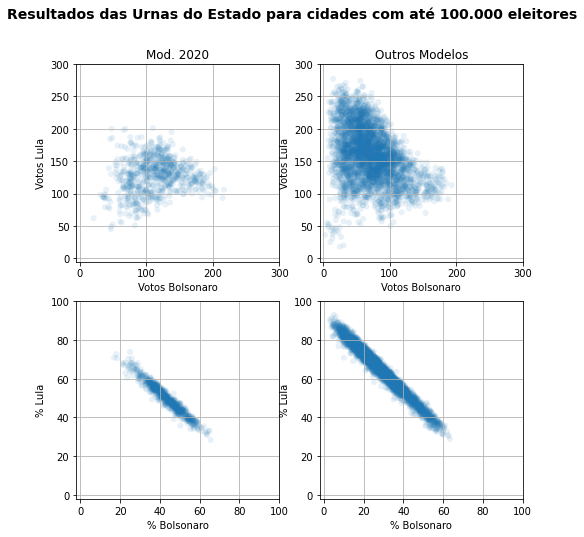

In [22]:
# Gráfico para o grupo de municípios ate 100k eleitores
# Urnas 2020
x1 = df_100k_2020['BOLSO']
y1 = df_100k_2020['LULA']
# Urnas de outros modelos
x2 = df_100k_outras['BOLSO']
y2 = df_100k_outras['LULA']

# Urnas 2020
x3 = df_100k_2020['%_BOLSO']
y3 = df_100k_2020['%_LULA']
# Urnas de outros modelos
x4 = df_100k_outras['%_BOLSO']
y4 = df_100k_outras['%_LULA']


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Resultados das Urnas do Estado para cidades com até 100.000 eleitores', fontsize=14, fontweight='bold')

ax1.scatter(x1, y1, alpha=0.1, edgecolors='none')
ax1.set_xlabel('Votos Bolsonaro')
ax1.set_ylabel('Votos Lula')
ax1.set_title('Mod. 2020')
ax1.set_xlim(-5, 300)
ax1.set_ylim(-5, 300)
ax1.grid(True)

ax2.scatter(x2, y2, alpha=0.1, edgecolors='none')
ax2.set_xlabel('Votos Bolsonaro')
ax2.set_ylabel('Votos Lula')
ax2.set_title('Outros Modelos')
ax2.set_xlim(-5, 300)
ax2.set_ylim(-5, 300)
ax2.grid(True)

ax3.scatter(x3, y3, alpha=0.1, edgecolors='none')
ax3.set_xlabel('% Bolsonaro')
ax3.set_ylabel('% Lula')
ax3.set_xlim(-2, 100)
ax3.set_ylim(-2, 100)
ax3.grid(True)

ax4.scatter(x4, y4, alpha=0.1, edgecolors='none')
ax4.set_xlabel('% Bolsonaro')
ax4.set_ylabel('% Lula')
ax4.set_xlim(-2, 100)
ax4.set_ylim(-2, 100)
ax4.grid(True)

plt.show()

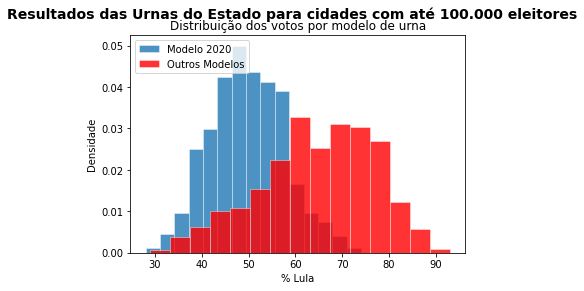

In [23]:
# Gráfico de distribuição dos votos por modelo de urna

curva_2020 = round(df_100k_2020['%_LULA'], 0)
curva_outras = round(df_100k_outras['%_LULA'], 0)

# plot:
fig, ax = plt.subplots()
fig.suptitle('Resultados das Urnas do Estado para cidades com até 100.000 eleitores', fontsize=14, fontweight='bold')

ax.hist(curva_2020, bins=15, linewidth=0.5, edgecolor="white", label='Modelo 2020', density=True, alpha=0.8)
ax.hist(curva_outras, bins=15, linewidth=0.5, edgecolor="white", label='Outros Modelos', color='red', density=True, alpha=0.8)

ax.set_xlabel('% Lula')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição dos votos por modelo de urna')
ax.legend(loc='upper left')

plt.show()

In [24]:
# Síntese do dataframe

ab = round(100 * df_100k_2020['QT_ABSTENCOES'].sum() / df_100k_2020['QT_APTOS'].sum(), 2)
pt = round(100 * df_100k_2020['LULA'].sum() / df_100k_2020['QT_COMPARECIMENTO'].sum(), 2)
pl = round(100 * df_100k_2020['BOLSO'].sum() / df_100k_2020['QT_COMPARECIMENTO'].sum(), 2)
nu = round(100 * df_100k_2020['NULOS'].sum() / df_100k_2020['QT_COMPARECIMENTO'].sum(), 2)
print('Cidades até 100k habitantes - urnas modelo 2020')
print('Lula:', pt, '% dos votos')
print('Bolsonaro:', pl, '% dos votos')
print('Nulos:', nu, '% dos votos')
print('Abstenções:',ab, '% dos eleitores \n')

ab = round(100 * df_100k_outras['QT_ABSTENCOES'].sum() / df_100k_outras['QT_APTOS'].sum(), 2)
pt = round(100 * df_100k_outras['LULA'].sum() / df_100k_outras['QT_COMPARECIMENTO'].sum(), 2)
pl = round(100 * df_100k_outras['BOLSO'].sum() / df_100k_outras['QT_COMPARECIMENTO'].sum(), 2)
nu = round(100 * df_100k_outras['NULOS'].sum() / df_100k_outras['QT_COMPARECIMENTO'].sum(), 2)
print('Cidades até 100k habitantes - urnas de demais modelos')
print('Lula:', pt, '% dos votos')
print('Bolsonaro:', pl, '% dos votos')
print('Nulos:', nu, '% dos votos')
print('Abstenções:',ab, '% dos eleitores')

Cidades até 100k habitantes - urnas modelo 2020
Lula: 49.31 % dos votos
Bolsonaro: 43.86 % dos votos
Nulos: 6.83 % dos votos
Abstenções: 22.55 % dos eleitores 

Cidades até 100k habitantes - urnas de demais modelos
Lula: 64.6 % dos votos
Bolsonaro: 28.62 % dos votos
Nulos: 6.78 % dos votos
Abstenções: 26.34 % dos eleitores


## Resultados para municípios até 50.000 eleitores

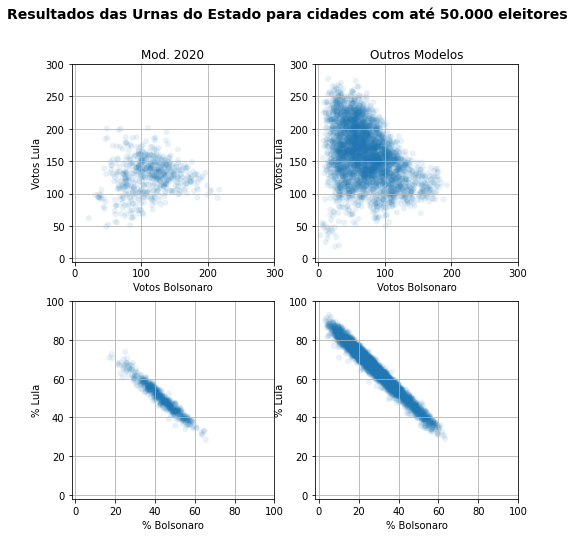

In [25]:
# Gráfico para o grupo de municípios ate 50k eleitores
# Urnas 2020
x1 = df_50k_2020['BOLSO']
y1 = df_50k_2020['LULA']
# Urnas de outros modelos
x2 = df_50k_outras['BOLSO']
y2 = df_50k_outras['LULA']

# Urnas 2020
x3 = df_50k_2020['%_BOLSO']
y3 = df_50k_2020['%_LULA']
# Urnas de outros modelos
x4 = df_50k_outras['%_BOLSO']
y4 = df_50k_outras['%_LULA']


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Resultados das Urnas do Estado para cidades com até 50.000 eleitores', fontsize=14, fontweight='bold')

ax1.scatter(x1, y1, alpha=0.1, edgecolors='none')
ax1.set_xlabel('Votos Bolsonaro')
ax1.set_ylabel('Votos Lula')
ax1.set_title('Mod. 2020')
ax1.set_xlim(-5, 300)
ax1.set_ylim(-5, 300)
ax1.grid(True)

ax2.scatter(x2, y2, alpha=0.1, edgecolors='none')
ax2.set_xlabel('Votos Bolsonaro')
ax2.set_ylabel('Votos Lula')
ax2.set_title('Outros Modelos')
ax2.set_xlim(-5, 300)
ax2.set_ylim(-5, 300)
ax2.grid(True)

ax3.scatter(x3, y3, alpha=0.1, edgecolors='none')
ax3.set_xlabel('% Bolsonaro')
ax3.set_ylabel('% Lula')
ax3.set_xlim(-2, 100)
ax3.set_ylim(-2, 100)
ax3.grid(True)

ax4.scatter(x4, y4, alpha=0.1, edgecolors='none')
ax4.set_xlabel('% Bolsonaro')
ax4.set_ylabel('% Lula')
ax4.set_xlim(-2, 100)
ax4.set_ylim(-2, 100)
ax4.grid(True)

plt.show()

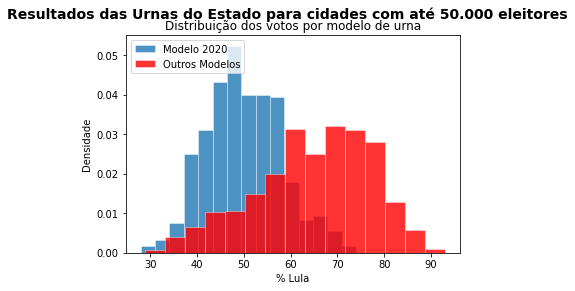

In [26]:
# Gráfico de distribuição dos votos por modelo de urna

curva_2020 = round(df_50k_2020['%_LULA'], 0)
curva_outras = round(df_50k_outras['%_LULA'], 0)

# plot:
fig, ax = plt.subplots()
fig.suptitle('Resultados das Urnas do Estado para cidades com até 50.000 eleitores', fontsize=14, fontweight='bold')

ax.hist(curva_2020, bins=15, linewidth=0.5, edgecolor="white", label='Modelo 2020', density=True, alpha=0.8)
ax.hist(curva_outras, bins=15, linewidth=0.5, edgecolor="white", label='Outros Modelos', color='red', density=True, alpha=0.8)

ax.set_xlabel('% Lula')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição dos votos por modelo de urna')
ax.legend(loc='upper left')

plt.show()

In [27]:
# Síntese do dataframe

ab = round(100 * df_50k_2020['QT_ABSTENCOES'].sum() / df_50k_2020['QT_APTOS'].sum(), 2)
pt = round(100 * df_50k_2020['LULA'].sum() / df_50k_2020['QT_COMPARECIMENTO'].sum(), 2)
pl = round(100 * df_50k_2020['BOLSO'].sum() / df_50k_2020['QT_COMPARECIMENTO'].sum(), 2)
nu = round(100 * df_50k_2020['NULOS'].sum() / df_50k_2020['QT_COMPARECIMENTO'].sum(), 2)
print('Cidades até 50k habitantes - urnas modelo 2020')
print('Lula:', pt, '% dos votos')
print('Bolsonaro:', pl, '% dos votos')
print('Nulos:', nu, '% dos votos')
print('Abstenções:',ab, '% dos eleitores \n')

ab = round(100 * df_50k_outras['QT_ABSTENCOES'].sum() / df_50k_outras['QT_APTOS'].sum(), 2)
pt = round(100 * df_50k_outras['LULA'].sum() / df_50k_outras['QT_COMPARECIMENTO'].sum(), 2)
pl = round(100 * df_50k_outras['BOLSO'].sum() / df_50k_outras['QT_COMPARECIMENTO'].sum(), 2)
nu = round(100 * df_50k_outras['NULOS'].sum() / df_50k_outras['QT_COMPARECIMENTO'].sum(), 2)
print('Cidades até 50k habitantes - urnas de demais modelos')
print('Lula:', pt, '% dos votos')
print('Bolsonaro:', pl, '% dos votos')
print('Nulos:', nu, '% dos votos')
print('Abstenções:',ab, '% dos eleitores')

Cidades até 50k habitantes - urnas modelo 2020
Lula: 49.57 % dos votos
Bolsonaro: 43.57 % dos votos
Nulos: 6.86 % dos votos
Abstenções: 23.24 % dos eleitores 

Cidades até 50k habitantes - urnas de demais modelos
Lula: 64.83 % dos votos
Bolsonaro: 28.41 % dos votos
Nulos: 6.77 % dos votos
Abstenções: 26.45 % dos eleitores


## Conclusão 1

Percebe-se para ambos os grupos de municípios com 100.000 e 50.000 eleitores uma discrepância muito grande dos resultados mudando apenas a variável do modelo de urna utilizado, destacando-se a alta concentração de urnas que apresentaram um quantitativo de menos de 100 votos para Bolsonaro ou mais de 150 votos para Lula, bem como o quantitativo de urnas que apresentaram mais de 60% dos votos para Lula.

Tendo em vista que as cidades são as mesmas e com grupo relativamente homogêneo de habitantes, foram desconsideradas as capitais e maiores cidades do estado, com exceção do modelo da urna, todas as demais variáveis são iguais para ambos os grupos e a mudança de modelo não deveria apresentar variação na distribuição do resultado.

Os resultados aqui apresentados validam a tese da live apresentada na Argentina por Fernando Cerimedo em 05/11/2022, bem como que as informações do Portal de dados abertos do TSE não sofreram alterações, tendo em vista que a base de dados deste notebook foi baixada no dia 06/11/2022, após boatos da alteração. 

## Estudos complementares

Tendo em vista questionamentos que as cidades nas quais foram alocadas as urnas 2020 eram mais próximas da capital, com um perfil mais desenvolvido das demais, o que descartaria a hipótese da faixa homogênea de municípios, foi realizada mais uma rodada de estudos com municípios com a mesma faiza de IDH.

### Localização dos municípios com urnas do modelo 2020

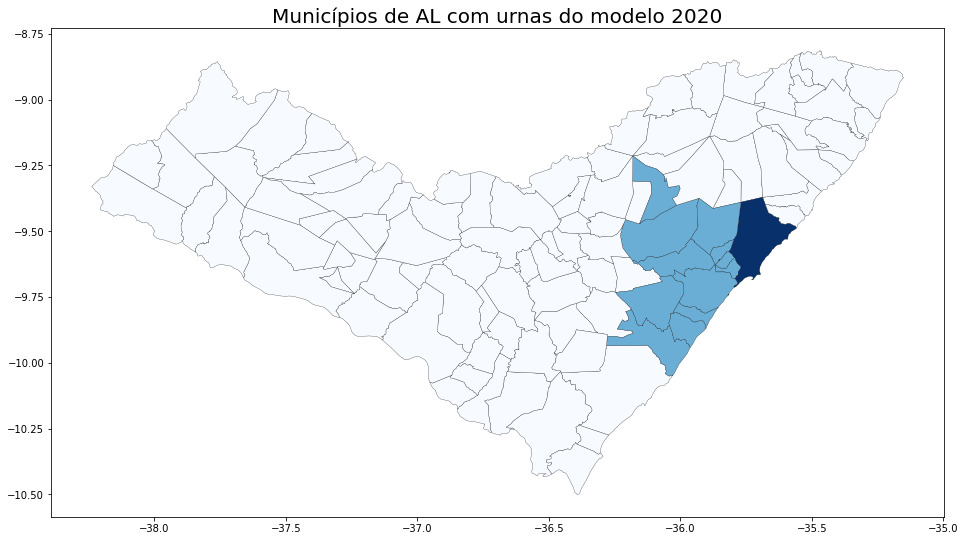

In [28]:
# Função para inclusão dos dados do GeoDataframe do Município

# Baixa o GeoDataFrame com os estados do Brasil e DF
br_mun = geobr.read_municipality()
br_mun.head()

#identificando a UF a partir do nome do arquivo
uf = arquivo[8:10]

# Reduzindo o GeoDaataFrame para o estado em análise
br_mun_uf = br_mun[br_mun['abbrev_state'] == uf].reset_index()

# Transformando a coluna de municípios para maiúscula para realizar o merge
br_mun_uf['name_muni'] = list(map(str.upper, br_mun_uf['name_muni']))

# Criando uma coluna identificando municípios com urnas do modelo 2020
mun_2020 = list(df_100k[df_100k['MODELO'] == 2020]['NM_MUNICIPIO'].unique())
capitais = ['FORTALEZA', 'MACEIÓ', 'SÃO LUÍS', 'JOÃO PESSOA', 'RECIFE', 'NATAL']

lista = []

for i in range(len(br_mun_uf)):
    if br_mun_uf['name_muni'][i] in capitais:
        x = 2
    else:
        if br_mun_uf['name_muni'][i] in mun_2020:
            x = 1
        else:
            x = 0
            
    lista.append(x)
    
br_mun_uf['mod_2020'] = lista


# Plotando o Mapa
data = br_mun_uf[['geometry', 'mod_2020']]

f, ax = plt.subplots()
f.set_size_inches(16, 16)
data.plot(ax=ax, # Axis de destino do gráfico
          column= 'mod_2020', # Coluna com os valores usados para colorir o mapa
          cmap='Blues', # Mapa de cores
          edgecolor='black', # Cor dos contornos
          linewidth=0.25) # Espessura dos contornos

ax.set_title(f'Municípios de {uf} com urnas do modelo 2020',fontdict={"fontsize": 20})

plt.show()

### Comparação de cidades com a mesma faixa de IDH

In [29]:
# Tabela de IDH
arquivo = 'municípios_idh.csv'
df_idh = pd.read_csv(arquivo)

# Transformando a coluna de municípios para maiúscula para realizar o merge
df_idh['Município'] = list(map(str.upper, df_idh['Município']))

# Filtrando apenas o dado da UF
df_idh = df_idh[df_idh['UF'] == uf]

In [30]:
br_mun_idh= br_mun_uf.merge(df_idh[['Município', 
                                    'IDHM 2010', 
                                    'IDHM Renda', 
                                    'IDHM Longevidade', 
                                    'IDHM Educação']], how='inner', left_on= 'name_muni', right_on= 'Município')

ValueError: 'Orangess' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

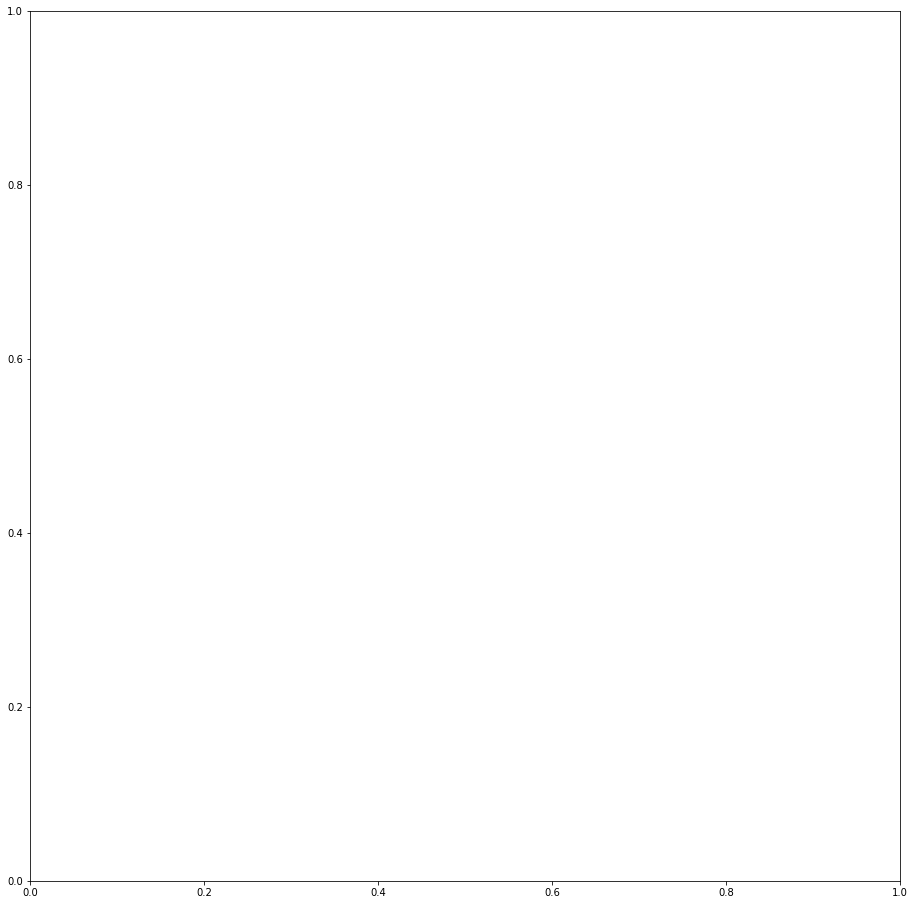

In [31]:
# Plotando o Mapa por IDH
data = br_mun_idh[['geometry', 'IDHM 2010']]

f, ax = plt.subplots()
f.set_size_inches(16, 16)
data.plot(ax=ax, # Axis de destino do gráfico
          column= 'IDHM 2010', # Coluna com os valores usados para colorir o mapa
          cmap='Orangess', # Mapa de cores
          edgecolor='black', # Cor dos contornos
          linewidth=0.25) # Espessura dos contornos

ax.set_title(f'IDH dos Municípios de {uf}',fontdict={"fontsize": 20})

plt.show()

In [ ]:
# Definindo a faixa de IDH dos municípios com a urna modelo 2020
idh_min = br_mun_idh[br_mun_idh['mod_2020'] == 1]['IDHM 2010'].min()
idh_max = br_mun_idh[br_mun_idh['mod_2020'] == 1]['IDHM 2010'].max()

# Visualizando a faixa de IDH geral e dos municípios com a urna modelo 2020
print(f'{uf}-IDH mínimo',br_mun_idh['IDHM 2010'].min())
print(f'{uf}-IDH máximo',br_mun_idh['IDHM 2010'].max())
print(f'{uf}-IDH mínimo com urnas 2020',idh_min)
print(f'{uf}-IDH máximo com urnas 2020',idh_max)

In [ ]:
# Gerando a lista de municípios que se enquadram no intervalo
lista_mun_fx_idh = list(br_mun_idh[(br_mun_idh['IDHM 2010'] >= idh_min) & 
                                   (br_mun_idh['IDHM 2010'] <= idh_max)]['name_muni'])

In [ ]:
# Listando os municípios com urna 2020 deste intervalo
br_mun_idh[(br_mun_idh['Município'].isin(lista_mun_fx_idh)) & 
           (br_mun_idh['mod_2020'] == 1)].iloc[:,-5:]

In [ ]:
# Filtrando os municípios da faixa específica de IDH dos dataframes principais
df_50k_2020_idh = df_100k_2020[df_100k_2020['NM_MUNICIPIO'].isin(lista_mun_fx_idh)]
df_50k_outras_idh = df_100k_outras[df_100k_outras['NM_MUNICIPIO'].isin(lista_mun_fx_idh)]

In [ ]:
# Gráfico para o grupo de municípios ate 50k eleitores
# Urnas 2020
x1 = df_50k_2020_idh['BOLSO']
y1 = df_50k_2020_idh['LULA']
# Urnas de outros modelos
x2 = df_50k_outras_idh['BOLSO']
y2 = df_50k_outras_idh['LULA']

# Urnas 2020
x3 = df_50k_2020_idh['%_BOLSO']
y3 = df_50k_2020_idh['%_LULA']
# Urnas de outros modelos
x4 = df_50k_outras_idh['%_BOLSO']
y4 = df_50k_outras_idh['%_LULA']


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle(f'Urnas do Estado de de {uf} com até 50.000 eleitores e IDH de {idh_min} a {idh_max}',
             fontsize=14, fontweight='bold')

ax1.scatter(x1, y1, alpha=0.1, edgecolors='none')
ax1.set_xlabel('Votos Bolsonaro')
ax1.set_ylabel('Votos Lula')
ax1.set_title('Mod. 2020')
ax1.set_xlim(-5, 300)
ax1.set_ylim(-5, 300)
ax1.grid(True)

ax2.scatter(x2, y2, alpha=0.1, edgecolors='none')
ax2.set_xlabel('Votos Bolsonaro')
ax2.set_ylabel('Votos Lula')
ax2.set_title('Outros Modelos')
ax2.set_xlim(-5, 300)
ax2.set_ylim(-5, 300)
ax2.grid(True)

ax3.scatter(x3, y3, alpha=0.1, edgecolors='none')
ax3.set_xlabel('% Bolsonaro')
ax3.set_ylabel('% Lula')
ax3.set_xlim(-2, 100)
ax3.set_ylim(-2, 100)
ax3.grid(True)

ax4.scatter(x4, y4, alpha=0.1, edgecolors='none')
ax4.set_xlabel('% Bolsonaro')
ax4.set_ylabel('% Lula')
ax4.set_xlim(-2, 100)
ax4.set_ylim(-2, 100)
ax4.grid(True)

plt.show()

In [ ]:
# Gráfico de distribuição dos votos por modelo de urna

curva_2020 = round(df_50k_2020_idh['%_LULA'], 0)
curva_outras = round(df_50k_outras_idh['%_LULA'], 0)

# plot:
fig, ax = plt.subplots()
fig.suptitle(f'Urnas do Estado de de {uf} com até 50.000 eleitores e IDH de {idh_min} a {idh_max}',
             fontsize=14, fontweight='bold')

ax.hist(curva_2020, bins=15, linewidth=0.5, edgecolor="white", label='Modelo 2020', density=True, alpha=0.8)
ax.hist(curva_outras, bins=15, linewidth=0.5, edgecolor="white", label='Outros Modelos', color='red', density=True, alpha=0.8)

ax.set_xlabel('% Lula')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição dos votos por modelo de urna')
ax.legend(loc='upper left')

plt.show()

## Conclusão 2

Mesmo levando em consideração a faixa do IDH dos municípios as disparidades entre as urnas dos modelo 2020 com as demais permacecem tão discrepantes quanto a análise anterior. Discrepância que não deveria existir mudando apenas a variável do modelo de urna utilizado.

Os resultados aqui apresentados permanecem validando a tese da live apresentada na Argentina por Fernando Cerimedo em 05/11/2022.